In [65]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
%matplotlib inline

In [66]:
df = pd.read_csv('Resources/US_French_Chardonnays.csv')
df.head()

,ID,alcohol,category,country,description,designation,price,rating,rating_bin,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,4,14.1,White,US,This white has an expert level of intensity an...,Dutton Ranch Walker Hill Vineyard,50.0,94,91-100,California,Sonoma,Green Valley,Dutton-Goldfield 2016 Dutton Ranch Walker Hill...,https://www.winemag.com/buying-guide/dutton-go...,Chardonnay,2016,Dutton-Goldfield
1,53,13.8,White,US,"This is a structured and remarkable wine, burs...",Year of the Monkey Single Vineyard,60.0,94,91-100,California,Napa-Sonoma,Carneros,Donum 2016 Year of the Monkey Single Vineyard ...,https://www.winemag.com/buying-guide/donum-201...,Chardonnay,2016,Donum
2,74,14.7,White,US,"This is a grainy, structured and textured whit...",Lewis MacGregor Estate Vineyard,65.0,94,91-100,California,Sonoma,Russian River Valley,Williams Selyem 2016 Lewis MacGregor Estate Vi...,https://www.winemag.com/buying-guide/williams-...,Chardonnay,2016,Williams Selyem
3,156,14.4,White,US,This has gorgeous aromas of ginger and crushed...,Gap's Crown,58.0,95,91-100,California,Sonoma,Sonoma Coast,Black Kite 2016 Gap's Crown Chardonnay (Sonoma...,https://www.winemag.com/buying-guide/black-kit...,Chardonnay,2016,Black Kite
4,169,14.5,White,US,This lovely vineyard-designate is expertly put...,Toyon Vineyard,125.0,95,91-100,California,Napa-Sonoma,Los Carneros,Alpha Omega 2015 Toyon Vineyard Chardonnay (Lo...,https://www.winemag.com/buying-guide/alpha-ome...,Chardonnay,2015,Alpha Omega


In [67]:
df = df.drop(['ID', 'alcohol', 'category', 'description', 'designation', 'rating', 'title', 'url', 'varietal', 'vintage','winery'], axis=1)
df.head()


,country,price,rating_bin,region,subregion,subsubregion
0,US,50.0,91-100,California,Sonoma,Green Valley
1,US,60.0,91-100,California,Napa-Sonoma,Carneros
2,US,65.0,91-100,California,Sonoma,Russian River Valley
3,US,58.0,91-100,California,Sonoma,Sonoma Coast
4,US,125.0,91-100,California,Napa-Sonoma,Los Carneros


In [68]:
df = df.dropna(subset=['subsubregion'])
df

,country,price,rating_bin,region,subregion,subsubregion
0,US,50.0,91-100,California,Sonoma,Green Valley
1,US,60.0,91-100,California,Napa-Sonoma,Carneros
2,US,65.0,91-100,California,Sonoma,Russian River Valley
3,US,58.0,91-100,California,Sonoma,Sonoma Coast
4,US,125.0,91-100,California,Napa-Sonoma,Los Carneros
...,...,...,...,...,...,...
13683,US,44.0,85-90,California,Central Coast,Santa Lucia Highlands
13684,US,25.0,91-100,California,Central Coast,Santa Maria Valley
13685,US,30.0,91-100,California,Central Coast,Arroyo Seco
13686,US,29.0,91-100,California,Central Coast,Santa Barbara County


In [69]:
X_df = pd.DataFrame(df)
X_df['subregion'] = X_df['subregion'].astype(str)


In [70]:
X = X_df.drop("rating_bin", axis=1)
y = df["rating_bin"]

In [71]:
X= X.apply(LabelEncoder().fit_transform)
print(X)

       country  price  region  subregion  subsubregion
0            0     57       0         14            44
1            0     67       0          9            15
2            0     72       0         14           103
3            0     65       0         14           127
4            0     95       0          9            57
...        ...    ...     ...        ...           ...
13683        0     51       0          1           118
13684        0     31       0          1           120
13685        0     37       0          1             8
13686        0     35       0          1           113
13687        0     22       0          1            53

[10668 rows x 5 columns]


In [72]:
X = X.values.astype("float32")
print(X)
# y = y.values.astype("float32")

[[  0.  57.   0.  14.  44.]
 [  0.  67.   0.   9.  15.]
 [  0.  72.   0.  14. 103.]
 ...
 [  0.  37.   0.   1.   8.]
 [  0.  35.   0.   1. 113.]
 [  0.  22.   0.   1.  53.]]


In [73]:
le = LabelEncoder()
le.fit(y)
print(y)
encoded_y = le.transform(y)
encoded_y

0        91-100
1        91-100
2        91-100
3        91-100
4        91-100
          ...  
13683     85-90
13684    91-100
13685    91-100
13686    91-100
13687     85-90
Name: rating_bin, Length: 10668, dtype: object


array([1, 1, 1, ..., 1, 1, 0])

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=42)

In [75]:
le2 = LabelEncoder()
le2.fit(y_train)
encoded_y_train = le2.transform(y_train)
encoded_y_test = le2.transform(y_test)
encoded_y_test
# len(encoded_y_train)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [76]:
X_train, x_val, y_train, y_val = train_test_split(X_train, encoded_y_train, random_state=42)

In [78]:
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
print(len(y_train_categorical))
len(X_train)

6000


6000

In [79]:
scaler_model = StandardScaler()

In [80]:
X_scaler = scaler_model.fit(X_train)

In [81]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [82]:
input_dims = X_train.shape[1]
input_dims

5

In [319]:
model = Sequential()
model.add(Dense(8, activation = 'relu', input_dim=(input_dims)))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_180"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_432 (Dense)            (None, 8)                 48        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_433 (Dense)            (None, 8)                 72        
_________________________________________________________________
dense_434 (Dense)            (None, 2)                 18        
Total params: 138
Trainable params: 138
Non-trainable params: 0
_________________________________________________________________


In [320]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [321]:
history = model.fit(X_train_scaled, y_train_categorical, epochs=100, batch_size=40,  verbose=1, validation_split=0.2)

Train on 4800 samples, validate on 1200 samples
Epoch 1/100
4800/4800 [==============================] - 0s 88us/step - loss: 0.6514 - accuracy: 0.6367 - val_loss: 0.5835 - val_accuracy: 0.7417
Epoch 2/100
4800/4800 [==============================] - 0s 23us/step - loss: 0.5415 - accuracy: 0.7262 - val_loss: 0.4821 - val_accuracy: 0.7417
Epoch 3/100
4800/4800 [==============================] - 0s 27us/step - loss: 0.4843 - accuracy: 0.7490 - val_loss: 0.4322 - val_accuracy: 0.7867
Epoch 4/100
4800/4800 [==============================] - 0s 28us/step - loss: 0.4597 - accuracy: 0.7779 - val_loss: 0.4130 - val_accuracy: 0.7842
Epoch 5/100
4800/4800 [==============================] - 0s 28us/step - loss: 0.4543 - accuracy: 0.7754 - val_loss: 0.4061 - val_accuracy: 0.7992
Epoch 6/100
4800/4800 [==============================] - 0s 28us/step - loss: 0.4506 - accuracy: 0.7804 - val_loss: 0.4050 - val_accuracy: 0.7992
Epoch 7/100
4800/4800 [==============================] - 0s 28us/step - loss

4800/4800 [==============================] - 0s 33us/step - loss: 0.4279 - accuracy: 0.7912 - val_loss: 0.4032 - val_accuracy: 0.7967
Epoch 57/100
4800/4800 [==============================] - 0s 33us/step - loss: 0.4297 - accuracy: 0.7910 - val_loss: 0.4043 - val_accuracy: 0.7950
Epoch 58/100
4800/4800 [==============================] - 0s 25us/step - loss: 0.4272 - accuracy: 0.7954 - val_loss: 0.4031 - val_accuracy: 0.7942
Epoch 59/100
4800/4800 [==============================] - 0s 27us/step - loss: 0.4252 - accuracy: 0.7942 - val_loss: 0.4043 - val_accuracy: 0.7950
Epoch 60/100
4800/4800 [==============================] - 0s 25us/step - loss: 0.4276 - accuracy: 0.7946 - val_loss: 0.4040 - val_accuracy: 0.7967
Epoch 61/100
4800/4800 [==============================] - 0s 25us/step - loss: 0.4279 - accuracy: 0.7923 - val_loss: 0.4048 - val_accuracy: 0.7967
Epoch 62/100
4800/4800 [==============================] - 0s 26us/step - loss: 0.4276 - accuracy: 0.7931 - val_loss: 0.4033 - val_a

In [314]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.4230881334356838, Accuracy: 0.7934008240699768


In [315]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [316]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {le.inverse_transform(list(y_test[:5]))}")
# print(f"X Values: {list(X_test[:5])}")

Predicted classes: ['85-90' '91-100' '85-90' '85-90' '85-90']
Actual Labels: ['85-90' '85-90' '85-90' '85-90' '85-90']


In [89]:
# model.save('modelChardonnays.h5')

In [317]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


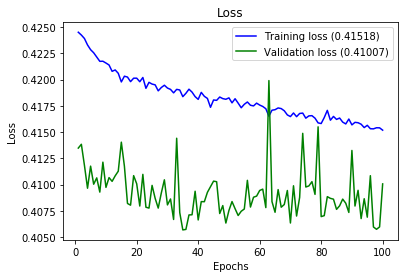

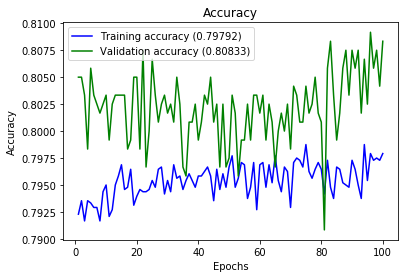

In [318]:
plot_history(history)

In [297]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [298]:
## multiclass or binary report
## If binary (sigmoid output), set binary parameter to True
def full_multiclass_report(model,
                           x,
                           y_true,
                           classes,
                           batch_size=32,
                           binary=True):

    # 1. Transform one-hot encoded y_true into their class number
#     if not binary:
#         y_true = np.argmax(y_true,axis=1)
    
    # 2. Predict classes and stores in y_pred
    y_pred = model.predict_classes(x, batch_size=batch_size)
    
    # 3. Print accuracy score
    print("Accuracy : "+ str(accuracy_score(y_true,y_pred)))
    
    print("")
    
    # 4. Print classification report
    print("Classification Report")
    print(classification_report(y_true,y_pred,digits=5))    
    
    # 5. Plot confusion matrix
    cnf_matrix = confusion_matrix(y_true,y_pred)
    print(cnf_matrix)
    plot_confusion_matrix(cnf_matrix,classes=classes)

Accuracy : 0.3328335832083958

Classification Report
              precision    recall  f1-score   support

           0    1.00000   0.05920   0.11178      1419
           1    0.30360   1.00000   0.46579       582

    accuracy                        0.33283      2001
   macro avg    0.65180   0.52960   0.28878      2001
weighted avg    0.79745   0.33283   0.21474      2001

[[  84 1335]
 [   0  582]]


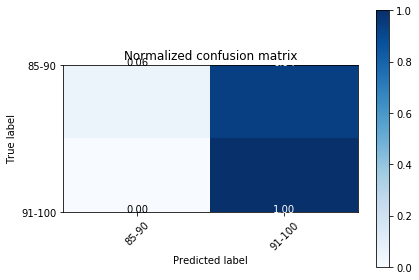

In [299]:
full_multiclass_report(model,
                       x_val,
                       y_val,
                       le.inverse_transform(np.arange(2)))

In [287]:

print(X_test_scaled)
print(y_test)


[[ 0.          0.26657552 -0.40972933 -1.0773154   1.3605162 ]
 [ 0.          1.8215991  -0.40972933  0.25813058 -1.3828738 ]
 [ 0.          0.32211205 -0.40972933  1.0927843   1.0364938 ]
 ...
 [ 0.         -0.7330826  -0.40972933 -1.0773154  -0.25959596]
 [ 0.          0.15550236 -0.40972933  0.09119983 -0.02197952]
 [ 0.          0.15550236  1.9382898   1.4266459   1.2957116 ]]
[0 0 0 ... 0 0 1]


Accuracy : 0.787026621672291

Classification Report
              precision    recall  f1-score   support

           0    0.82649   0.89109   0.85757      1919
           1    0.65050   0.52005   0.57801       748

    accuracy                        0.78703      2667
   macro avg    0.73849   0.70557   0.71779      2667
weighted avg    0.77713   0.78703   0.77916      2667

[[1710  209]
 [ 359  389]]


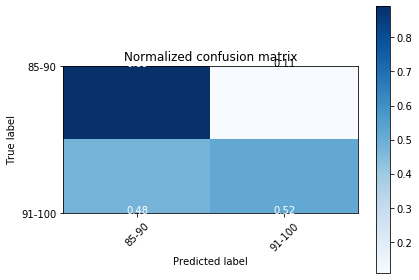

In [300]:
full_multiclass_report(model,
                       X_test_scaled,
                       y_test,
                       le.inverse_transform(np.arange(2)))

In [309]:
# GridSearch
def create_model(dense_layers=[8],
                 activation='relu',
                 optimizer='rmsprop'):
    model = Sequential()

    for index, lsize in enumerate(dense_layers):
        # Input Layer - includes the input_shape
        if index == 0:
            model.add(Dense(lsize,
                            activation=activation,
                            input_shape=(5,)))
        else:
            model.add(Dense(lsize,
                            activation=activation))
            
    model.add(Dense(2,activation='sigmoid'))
    model.compile(optimizer = optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,
                        epochs=100, 
                        batch_size=50,
                        verbose=2)

param_grid = {'dense_layers': [[8,8],[10,8],[8,6]],
              'activation':['relu','tanh'],
              'optimizer':('rmsprop','adam'),
              'epochs':[50,100],
              'batch_size':[5,50]}

grid = GridSearchCV(model,
                    param_grid=param_grid,
                    return_train_score=True,
                    scoring=['precision_macro','recall_macro','f1_macro'],
                    refit='precision_macro')

grid_results = grid.fit(X_train_scaled,y_train)

print('Parameters of the best model: ')
print(grid_results.best_params_)

Epoch 1/50
 - 1s - loss: 0.5236 - accuracy: 0.7278
Epoch 2/50
 - 1s - loss: 0.4334 - accuracy: 0.7745
Epoch 3/50
 - 1s - loss: 0.4218 - accuracy: 0.7860
Epoch 4/50
 - 1s - loss: 0.4209 - accuracy: 0.7855
Epoch 5/50
 - 1s - loss: 0.4194 - accuracy: 0.7883
Epoch 6/50
 - 1s - loss: 0.4177 - accuracy: 0.7880
Epoch 7/50
 - 1s - loss: 0.4169 - accuracy: 0.7872
Epoch 8/50
 - 1s - loss: 0.4184 - accuracy: 0.7890
Epoch 9/50
 - 1s - loss: 0.4186 - accuracy: 0.7895
Epoch 10/50
 - 1s - loss: 0.4167 - accuracy: 0.7910
Epoch 11/50
 - 1s - loss: 0.4175 - accuracy: 0.7893
Epoch 12/50
 - 1s - loss: 0.4164 - accuracy: 0.7872
Epoch 13/50
 - 1s - loss: 0.4170 - accuracy: 0.7908
Epoch 14/50
 - 1s - loss: 0.4177 - accuracy: 0.7908
Epoch 15/50
 - 1s - loss: 0.4167 - accuracy: 0.7915
Epoch 16/50
 - 1s - loss: 0.4165 - accuracy: 0.7910
Epoch 17/50
 - 1s - loss: 0.4158 - accuracy: 0.7908
Epoch 18/50
 - 1s - loss: 0.4169 - accuracy: 0.7915
Epoch 19/50
 - 1s - loss: 0.4153 - accuracy: 0.7910
Epoch 20/50
 - 1s - l

KeyboardInterrupt: 

In [199]:
le.inverse_transform(np.arange(2))

array(['85-90', '91-100'], dtype=object)